Here is an example of how to process the RBR Virtuoso Tu in a python notebook. <br>
You will need a RBRTu_config.yaml file with the following (edited for your deployment), <br>
You will find examples of these in the examples directory:

    basefile: 'RBRTu_rawdata'
    filename: '111012RBRTu'
    LatLonDatum: 'NAD83'
    initial_instrument_height: 0.4  # meters - estimated!!!
    instrument_type: 'Virtuoso Tu'
    
<br>
You will also need a global attribute file RBRTu_glob_att.txt with the following (edited for your deployment):

    SciPi; J. Warner
    PROJECT; USGS Coastal Marine Geology Program
    EXPERIMENT; Matanzas Inlet Sediment Transport
    DESCRIPTION; Shallow site Quadpod
    DATA_SUBTYPE; MOORED
    DATA_ORIGIN; USGS WHCMSC Sediment Transport Group
    COORD_SYSTEM; GEOGRAPHIC
    Conventions; PMEL/EPIC
    MOORING; 1110
    WATER_DEPTH; 8.6
    WATER_DEPTH_NOTE; (meters), ship's echosounder
    latitude; 29.711400
    longitude; -81.218633
    magnetic_variation; -6.7
    Deployment_date; 24-Jan-2018
    Recovery_date; 13-Apr-2018
    DATA_CMNT;  
    platform_type; Large quadpod Lander
    DRIFTER; 0
    POS_CONST; 0
    DEPTH_CONST; 0
    COORD_SYSTEM; GEOGRAPHIC
    Conventions; PMEL/EPIC
    institution; United States Geological Survey, Woods Hole Coastal and Marine Science Center
    institution_url; http://woodshole.er.usgs.gov

In [1]:
import sys
# edit these paths as necessary for your operating system and python setup
sys.path.append('C:\\projects\\python\\stglib')
sys.path.append('C:\\projects\\python\\xmltodict')
import stglib
import yaml

Set up the metadata

In [2]:
# normally all these files and this executing code will be in the same directory
# for the structure of stglib on github, these examples are separated from the scripts
configfile = "..\\examples\\RBRTu_config.yaml"
gattfile = "..\\examples\\RBRTu_glob_att.txt"
# initialize metadata from the globalatts file
metadata = stglib.read_globalatts(gattfile)

# Add additional metadata from metadata config file
with open(configfile) as f:
    config = yaml.safe_load(f)

for k in config:
    metadata[k] = config[k]

# adjust the location of the data file to the examples directory
metadata['basefile'] = '..\\examples\\'+metadata['basefile']
    
# note the data file name is not returned by rsk_to_cdf
ncfilename = config['filename']+'-raw.cdf'

convert from raw data to netcdf, add metadata

In [3]:
RAW = stglib.rsk.rsk2cdf.rsk_to_cdf(metadata)

Loading from sqlite file ..\examples\RBRTu_rawdata.rsk; this may take a while for large datasets
Done fetching data
we are up to writing Turb
Writing to raw netCDF
Done


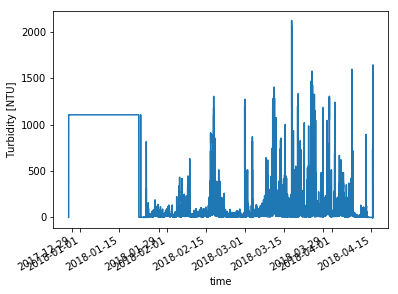

In [4]:
RAW['Turb'].plot()

In [5]:
RAW

<xarray.Dataset>
Dimensions:  (depth: 1, lat: 1, lon: 1, time: 156864)
Coordinates:
  * time     (time) datetime64[ns] 2017-12-27T19:40:26 ... 2018-04-15T18:03:26
  * depth    (depth) float64 8.2
  * lat      (lat) float64 29.71
  * lon      (lon) float64 -81.22
Data variables:
    Turb     (time) float64 -1.062 1.106e+03 1.106e+03 ... 1.106e+03 1.106e+03
Attributes:
    SciPi:                       J. Warner
    PROJECT:                     USGS Coastal Marine Geology Program
    EXPERIMENT:                  Matanzas Inlet Sediment Transport
    DESCRIPTION:                 Shallow site Quadpod
    DATA_SUBTYPE:                MOORED
    DATA_ORIGIN:                 USGS WHCMSC Sediment Transport Group
    COORD_SYSTEM:                GEOGRAPHIC
    Conventions:                 PMEL/EPIC
    MOORING:                     1110
    WATER_DEPTH:                 8.6
    WATER_DEPTH_NOTE:            (meters), ship's echosounder
    latitude:                    29.7114
    longitude:        

convert to EPIC format, trim for in water

In [6]:
nc = stglib.rsk.cdf2nc.cdf_to_nc(ncfilename)

first burst in full file: 2017-12-27T19:40:26.000000000
last burst in full file: 2018-04-15T18:03:26.000000000
Clipping data using Deployment_date and Recovery_date
first burst in trimmed file: 2018-01-24T00:00:26.000000000
last burst in trimmed file: 2018-04-13T23:59:26.000000000
Writing cleaned/trimmed data to .nc file
Done writing netCDF file 111012RBRTu-cal.nc


to plot conveniently we need to be in CF time, the dataset above is in EPIC, so convert back

In [7]:
nccf = stglib.utils.epic_to_cf_time(nc)

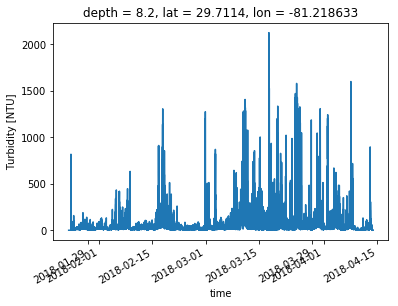

In [8]:
nccf['Turb'].plot()

Done!